# K-Means Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.75)
sns.set_style("white")

import random
np.random.seed(10)

K-Means Clustering in graspologic is a wrapper of [Sklearn's KMeans class](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Our algorithm finds the optimal kmeans clustering model by iterating over a range of values and creating a model with the lowest possible silhouette score, as defined in Sklearn [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html).

Let's use K-Means Clustering on synthetic data and compare it to the existing Sklearn implementation.

## Using K Means on Synthetic Data

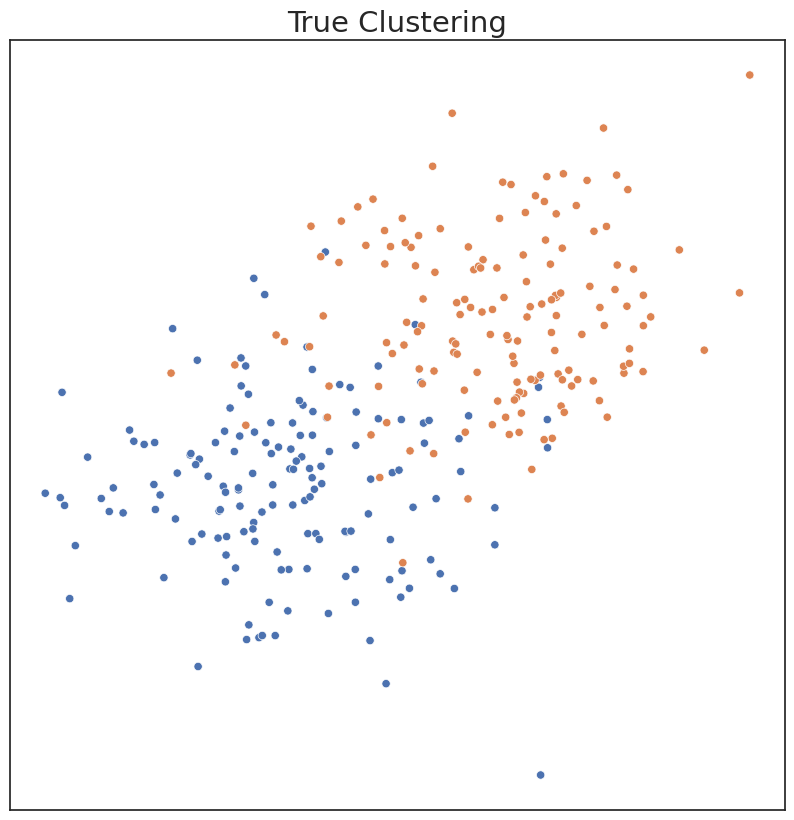

In [2]:
# Synthetic data

# Dim 1
class_1 = np.random.randn(150, 1)
class_2 = 2 + np.random.randn(150, 1)
dim_1 = np.vstack((class_1, class_2))

# Dim 2
class_1 = np.random.randn(150, 1)
class_2 = 2 + np.random.randn(150, 1)
dim_2 = np.vstack((class_1, class_2))

X = np.hstack((dim_1, dim_2))

# Labels
label_1 = np.zeros((150, 1))
label_2 = 1 + label_1

c = np.vstack((label_1, label_2)).reshape(300,)

# Plotting Function for Clustering
def plot(title, c_hat, X):
    plt.figure(figsize=(10, 10))
    n_components = int(np.max(c_hat) + 1)
    palette = sns.color_palette("deep")[:n_components]
    fig = sns.scatterplot(x=X[:,0], y=X[:,1], hue=c_hat, legend=None, palette=palette)
    fig.set(xticks=[], yticks=[], title=title)
    plt.show()

plot('True Clustering', c, X)

In the existing implementation of KMeans clustering in Sklearn, one has to choose parameters of the model, including number of components, apriori. If parameters are input that don't match the data well, clustering performance can suffer. Performance can be measured by ARI, a metric ranging from 0 to 1. An ARI score of 1 indicates the estimated clusters are identical to the true clusters.

/home/runner/.cache/pypoetry/virtualenvs/graspologic-pkHfzCJ8-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


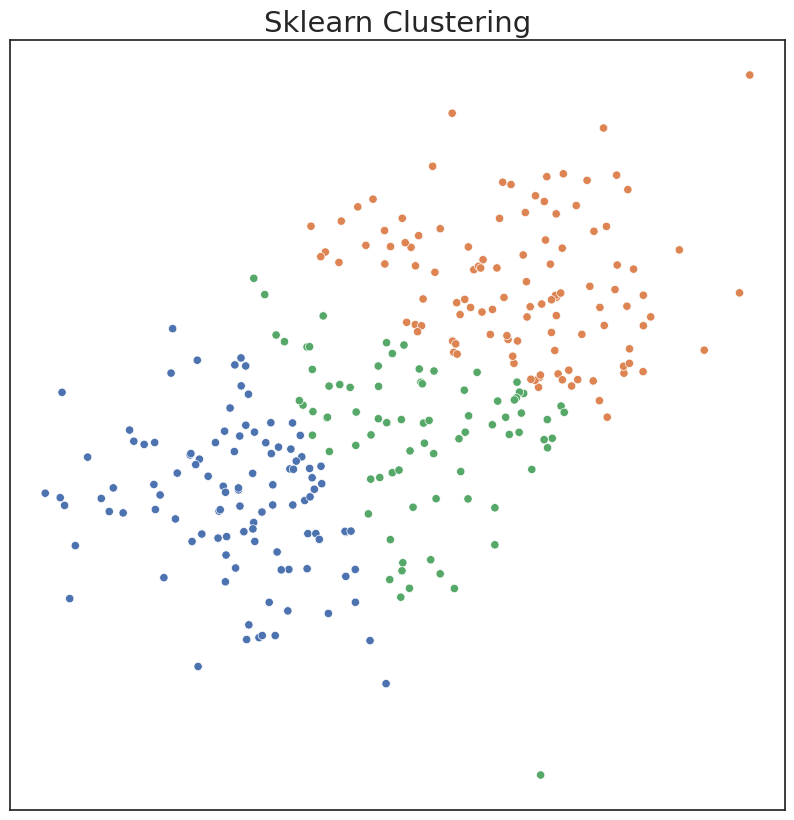

ARI Score for Model: 0.46


In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import adjusted_rand_score

from graspologic.utils import remap_labels

# Say user provides inaccurate estimate of number of components
kmeans_ = KMeans(3)
c_hat_kmeans = kmeans_.fit_predict(X)

# Remap Predicted labels
c_hat_kmeans = remap_labels(c, c_hat_kmeans)

plot('Sklearn Clustering', c_hat_kmeans, X)

# ARI Score
print("ARI Score for Model: %.2f" % adjusted_rand_score(c, c_hat_kmeans))

Our method expands upon the existing Sklearn framework by allowing the user to automatically estimate the best hyperparameters for a k-means clustering model. The ideal `n_clusters_`, less than the max value provided by the user, is found.

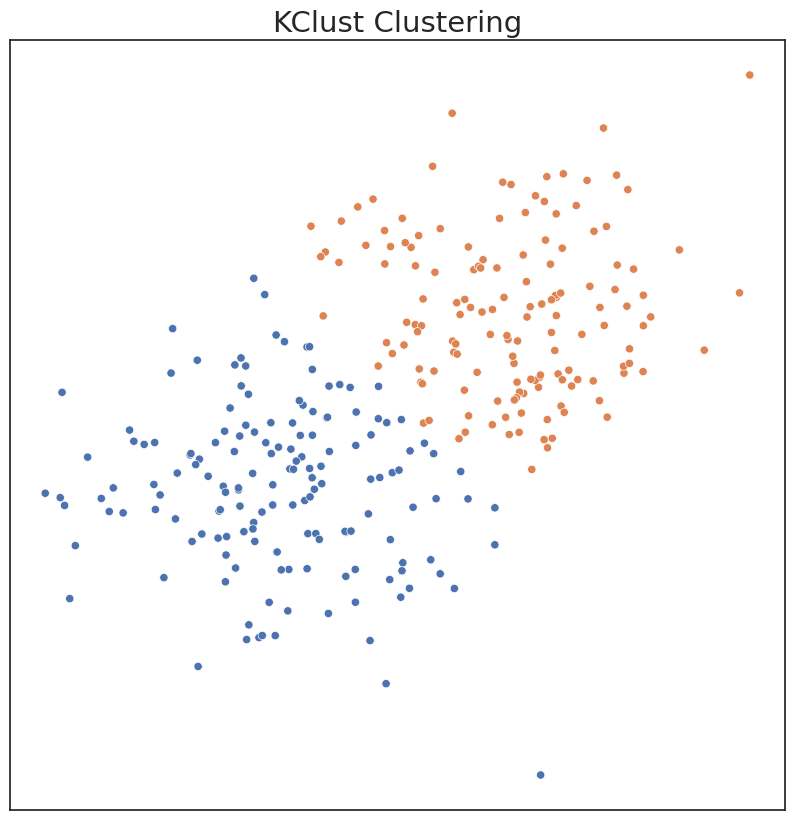

ARI Score for Model: 0.66


In [4]:
from graspologic.cluster.kclust import KMeansCluster

# Fit model
kclust_ = KMeansCluster(max_clusters=10)
c_hat_kclust = kclust_.fit_predict(X)

c_hat_kclust = remap_labels(c, c_hat_kclust)

plot('KClust Clustering', c_hat_kclust, X)

print("ARI Score for Model: %.2f" % adjusted_rand_score(c, c_hat_kclust))